In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
MODELS_INFO = {
    'gpt2-large': 'recurring__gsm8k__gpt2-large__output.json',
    'gemma-2b': 'recurring__gsm8k__gemma-2b__output.json',
    'gemma-7b':  None,#'recurring__gsm8k__gemma-7b__output.json',
}

RECURRING_TIMESTEPS = 5

In [3]:
def conv_float(x):
    return float(x.replace(',', '')) if len(x) > 0 else float('-inf')

def correct_answer_dist(instance, time_step, correct_answer):
    index = time_step - 1
    if len(instance['answer_distribution']) < time_step:
        index = -1
    answer_distribution = instance['answer_distribution'][index]
    percentage = 0
    for dist in answer_distribution:
        if conv_float(dist[0]) == correct_answer:
            percentage = dist[1]
            break
    return percentage

def get_correct_answer_presence(model_name, time_steps):
    if MODELS_INFO[model_name] is None:
        return 0
    file = os.path.join('../../results/', MODELS_INFO[model_name])
    output = json.load(open(file))
    
    return sum([1 for instance in output if correct_answer_dist(instance, time_steps, conv_float(instance['ground_truth_answers'])) > 0]) / len(output)

def get_percentage_of_correct_answers(model_name, time_steps):
    if MODELS_INFO[model_name] is None:
        return 0
    file = os.path.join('../../results/', MODELS_INFO[model_name])
    output = json.load(open(file))
    
    percentage = 0
    for instance in output:
        percentage += correct_answer_dist(instance, time_steps, conv_float(instance['ground_truth_answers']))
    return percentage / len(output)

In [4]:
plot_df = pd.DataFrame(columns=['model', 'time_step', 'correct_answer_presence', 'percentage_of_correct_answers'])

for model_name in MODELS_INFO:
    for time_step in range(1, RECURRING_TIMESTEPS + 1):
        print(f'Processing {model_name} at time step {time_step}')
        plot_df = pd.concat([plot_df, pd.DataFrame([{
            'model': model_name,
            'time_step': time_step,
            'correct_answer_presence': get_correct_answer_presence(model_name, time_step),
            'percentage_of_correct_answers': get_percentage_of_correct_answers(model_name, time_step)
        }])], ignore_index=True)

Processing gpt2-large at time step 1


/tmp/ipykernel_135655/3753665705.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame([{


Processing gpt2-large at time step 2
Processing gpt2-large at time step 3
Processing gpt2-large at time step 4
Processing gpt2-large at time step 5
Processing gemma-2b at time step 1
Processing gemma-2b at time step 2
Processing gemma-2b at time step 3
Processing gemma-2b at time step 4
Processing gemma-2b at time step 5
Processing gemma-7b at time step 1
Processing gemma-7b at time step 2
Processing gemma-7b at time step 3
Processing gemma-7b at time step 4
Processing gemma-7b at time step 5


In [5]:
plot_df 

,model,time_step,correct_answer_presence,percentage_of_correct_answers
0,gpt2-large,1,0.105892,0.019748
1,gpt2-large,2,0.067561,0.016805
2,gpt2-large,3,0.072338,0.016165
3,gpt2-large,4,0.075409,0.016620
4,gpt2-large,5,0.073590,0.016094
5,gemma-2b,1,0.456096,0.165122
6,gemma-2b,2,0.462580,0.161368
7,gemma-2b,3,0.455414,0.162079
8,gemma-2b,4,0.458940,0.162292
9,gemma-2b,5,0.454959,0.160743


[]

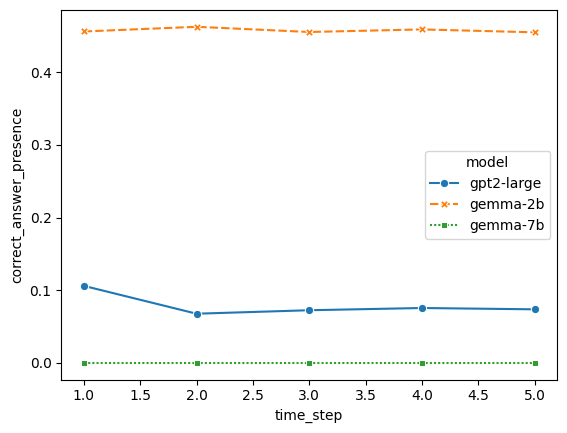

In [8]:
sns.lineplot(data=plot_df, x='time_step', y='correct_answer_presence', hue='model', markers=True, style='model')
plt.plot()

[]

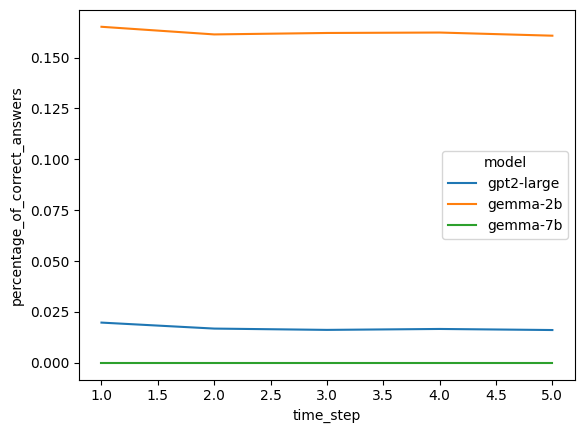

In [7]:
sns.lineplot(data=plot_df, x='time_step', y='percentage_of_correct_answers', hue='model', markers=True, style='model')
plt.plot()